IMPORTING MODUELS

In [213]:
import torch
from torch import nn

import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

from helper_functions import plot_decision_boundary

HYPERPARAMETERS

In [214]:
LEARNING_RATE = 0.1
INPUT_SHAPE = 2
HIDDEN_UNITS = 10
OUTPUT_SHAPE = 6
EPOCHS = 2000
DEVICE = "cuda" if torch.cuda.is_available() else 'cpu'
DEVICE

'cpu'

CREATING DATA

In [215]:
X, y = make_blobs(n_samples=1000,
                  n_features=2,
                  centers=6,
                  cluster_std=1.0,
                  shuffle=True,
                  random_state=231)
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.LongTensor)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=False)
X_train[0], y[0]

(tensor([-9.5942,  8.0781]), tensor(3))

VISUALIZING DATA

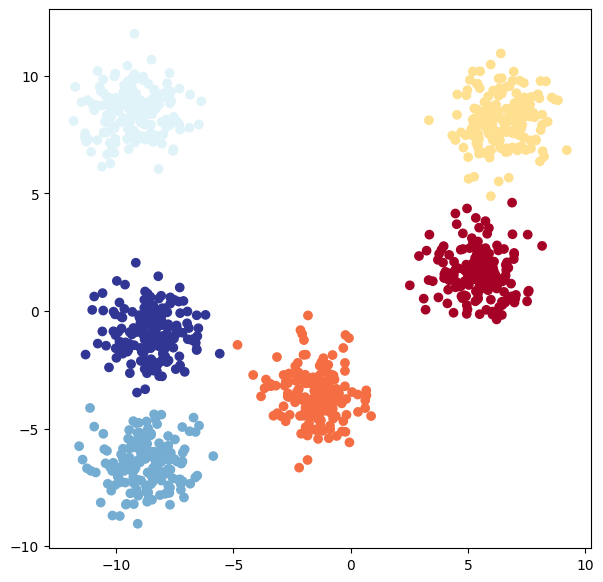

In [216]:
plt.figure(figsize=(7, 7))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

CREATING A MODEL

In [217]:
class BlobClassificationModel(nn.Module):
    def __init__(self, input_shape,
                 hidden_units, output_shape):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_shape)
        )
    def forward(self, x):
        return self.layer_stack(x)
                                
model = BlobClassificationModel(input_shape=INPUT_SHAPE,
                                hidden_units=HIDDEN_UNITS,
                                output_shape=OUTPUT_SHAPE).to(DEVICE)
model.state_dict()
model(X)

tensor([[-1.0334, -1.3197, -0.0686, -1.6827,  0.3700,  0.1670],
        [-0.2721, -0.6618, -0.4823,  0.4731, -0.6192,  0.0812],
        [-0.0017, -0.3699, -0.2199,  0.3118, -0.3216, -0.0516],
        ...,
        [-0.2227, -0.7073, -0.6633,  0.8711, -0.7774, -0.0114],
        [-0.0332, -0.9229, -0.2086, -0.3695,  0.1098,  0.5621],
        [-0.1789, -1.1814, -0.2604, -0.4303,  0.1498,  0.7136]],
       grad_fn=<AddmmBackward0>)

TRAINING LOOP

In [218]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model.parameters(),
                            lr=LEARNING_RATE)

torch.manual_seed(451)
torch.cuda.manual_seed(451)

for epoch in range(1, EPOCHS+1):
    # TRAINING
    model.train()

    y_train_logits = model(X_train)
    y_train_pred = torch.softmax(y_train_logits, dim=1).argmax(dim=1)

    train_loss = loss_fn(y_train_logits, y_train)

    optimizer.zero_grad()

    train_loss.backward()

    optimizer.step()

    # TRAINING
    model.eval()
    with torch.inference_mode():
        y_test_logits = model(X_test)
        y_test_pred = torch.softmax(y_test_logits, dim=1).argmax(dim=1)
        test_loss = loss_fn(y_test_logits, y_test)
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Train Loss: {train_loss:.4f} | Test Loss: {test_loss:.4f}")



Epoch: 100 | Train Loss: 0.0686 | Test Loss: 0.0516
Epoch: 200 | Train Loss: 0.0442 | Test Loss: 0.0276
Epoch: 300 | Train Loss: 0.0339 | Test Loss: 0.0200
Epoch: 400 | Train Loss: 0.0272 | Test Loss: 0.0158
Epoch: 500 | Train Loss: 0.0226 | Test Loss: 0.0135
Epoch: 600 | Train Loss: 0.0195 | Test Loss: 0.0119
Epoch: 700 | Train Loss: 0.0173 | Test Loss: 0.0107
Epoch: 800 | Train Loss: 0.0156 | Test Loss: 0.0100
Epoch: 900 | Train Loss: 0.0143 | Test Loss: 0.0094
Epoch: 1000 | Train Loss: 0.0132 | Test Loss: 0.0090
Epoch: 1100 | Train Loss: 0.0123 | Test Loss: 0.0086
Epoch: 1200 | Train Loss: 0.0115 | Test Loss: 0.0084
Epoch: 1300 | Train Loss: 0.0109 | Test Loss: 0.0082
Epoch: 1400 | Train Loss: 0.0100 | Test Loss: 0.0080
Epoch: 1500 | Train Loss: 0.0090 | Test Loss: 0.0084
Epoch: 1600 | Train Loss: 0.0082 | Test Loss: 0.0088
Epoch: 1700 | Train Loss: 0.0076 | Test Loss: 0.0088
Epoch: 1800 | Train Loss: 0.0072 | Test Loss: 0.0088
Epoch: 1900 | Train Loss: 0.0068 | Test Loss: 0.0088
Ep

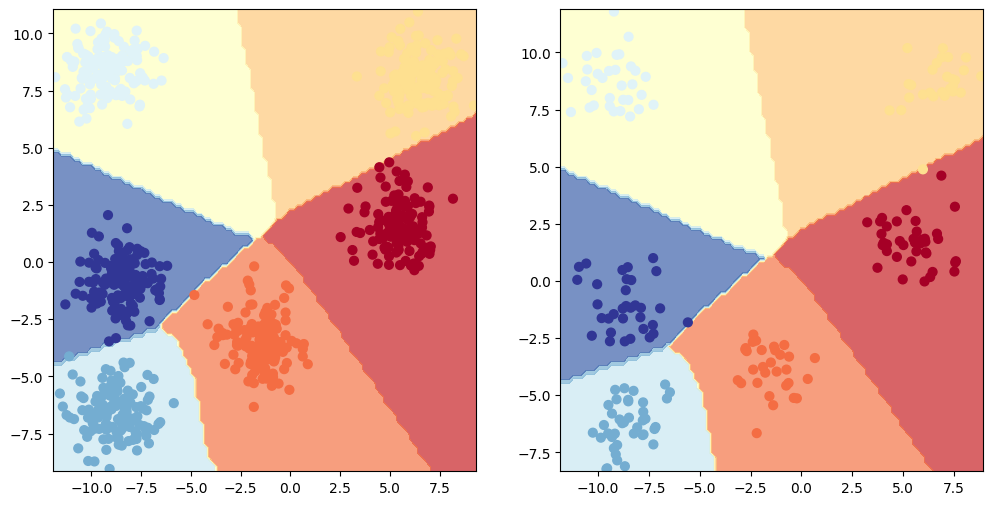

In [219]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plot_decision_boundary(model=model, X=X_train,
                       y=y_train)
plt.subplot(1, 2, 2)
plot_decision_boundary(model=model, X=X_test,
                       y=y_test)